In [53]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

In [54]:
space = pd.read_csv("./space/datas/train.csv")

In [55]:
space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# Explanation for every Columns
1. PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.2. 
HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.rct..dict.

3. CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
4. Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
5. Destination - The planet the passenger will be debarking to.
6. Age - The age of the passenger.


7. VIP - Whether the passenger has paid for special VIP service during the voyage.
8. RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
9. Name - The first and last names of the passenger.
10. Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict..dict.

In [56]:
space

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [57]:
space.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [58]:
# display stat. of all non-numeric variables
space.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [59]:
space["CryoSleep"].unique()

array([False, True, nan], dtype=object)

In [60]:
# check missing values for each variable
space.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

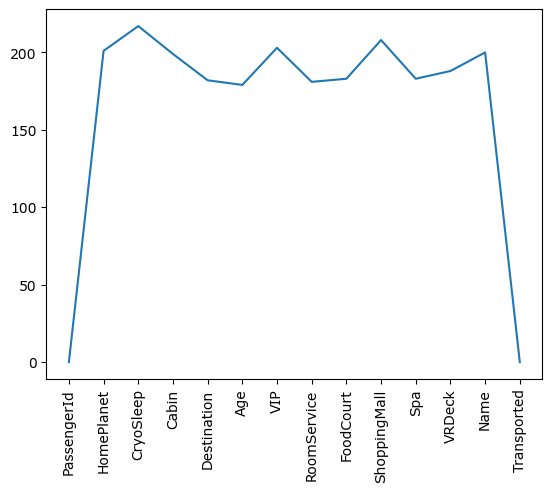

In [61]:
# plot missing values for each variable
space.isnull().sum().plot()
columns = space.columns
plt.xticks(np.arange(len(columns)), columns, rotation='vertical');

# Data processing plan
1. PassengerId to group
2. HomePlanet, Destination non-ordered obj(one-hot)
3. CryoSleep, VIP non-ordered obj (astype int
4. Cabin to 3 ordered or non-ordered obj (deck/num/side)
5. RoomService, FoodCourt, ShoppingMall, Spa, VRDeck take mediunm
6. Name, PassengerId, Cabin  drop


# 1. PassengerId to group


In [62]:
space["group"]=space["PassengerId"].map(lambda x:int(x[0:4]))
space[50:70]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,group
50,0052_01,Earth,False,G/6/S,TRAPPIST-1e,NaN,False,4.0,0.0,2.0,4683.0,0.0,Elaney Hubbarton,False,52
51,0053_01,Earth,False,F/11/S,TRAPPIST-1e,25.0,False,0.0,0.0,1938.0,0.0,1.0,Elson Hickerson,True,53
52,0056_01,Europa,False,A/1/S,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Okulas Tractive,True,56
53,0056_02,Europa,True,A/1/S,TRAPPIST-1e,38.0,False,0.0,0.0,0.0,0.0,0.0,Instab Tractive,True,56
54,0056_03,Europa,False,A/1/S,TRAPPIST-1e,27.0,False,279.0,605.0,3374.0,286.0,3.0,Zinoces Tractive,True,56
55,0058_01,Earth,True,G/7/S,PSO J318.5-22,36.0,False,0.0,0.0,0.0,0.0,0.0,Warry Ayalazquez,False,58
56,0061_01,Earth,False,F/12/S,TRAPPIST-1e,22.0,False,45.0,1096.0,148.0,1377.0,1.0,Shanya Salez,False,61
57,0062_01,Earth,False,F/13/S,TRAPPIST-1e,62.0,False,0.0,592.0,0.0,17.0,25.0,Sterry Greeves,False,62
58,0064_01,Mars,True,F/14/S,TRAPPIST-1e,15.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,64
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,True,64


# 2. HomePlanet, Destination non-ordered obj(one-hot)

In [63]:
space['HomePlanet'] = space['HomePlanet'].ffill()

ohe = OneHotEncoder()

X2 = ohe.fit_transform(space["HomePlanet"].values.reshape(-1, 1)).toarray()
set(space["HomePlanet"].unique())

# ohe pocess
ohe_list = np.sort("HP_is_"+space["HomePlanet"].unique())
df2 = pd.DataFrame(X2, columns=ohe_list)

# combine
space = pd.concat((space.drop("HomePlanet", axis=1), df2), axis=1)

space

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,group,HP_is_Earth,HP_is_Europa,HP_is_Mars
0,0001_01,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0.0,1.0,0.0
1,0002_01,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1.0,0.0,0.0
2,0003_01,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,0.0,1.0,0.0
3,0003_02,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,0.0,1.0,0.0
4,0004_01,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,0.0,1.0,0.0
8689,9278_01,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,1.0,0.0,0.0
8690,9279_01,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,1.0,0.0,0.0
8691,9280_01,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,0.0,1.0,0.0


In [64]:
space['Destination'] = space['Destination'].ffill()

ohe = OneHotEncoder()

X3 = ohe.fit_transform(space["Destination"].values.reshape(-1, 1)).toarray()
set(space["Destination"].unique())

# column process
ohe_list = np.sort("DS_is_"+space["Destination"].unique())
df3 = pd.DataFrame(X3, columns=ohe_list)

# combine
space = pd.concat((space.drop("Destination", axis=1), df3), axis=1)

# 3. CryoSleep, VIP non-ordered obj (astype int

In [65]:
space['CryoSleep'] = space['CryoSleep'].ffill()
space['CryoSleep'] = space['CryoSleep'].bfill()

space['CryoSleep'] = space['CryoSleep'].astype(int)

space

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,group,HP_is_Earth,HP_is_Europa,HP_is_Mars,DS_is_55 Cancri e,DS_is_PSO J318.5-22,DS_is_TRAPPIST-1e
0,0001_01,0,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0.0,1.0,0.0,0.0,0.0,1.0
1,0002_01,0,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1.0,0.0,0.0,0.0,0.0,1.0
2,0003_01,0,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,0.0,1.0,0.0,0.0,0.0,1.0
3,0003_02,0,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,0.0,1.0,0.0,0.0,0.0,1.0
4,0004_01,0,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,A/98/P,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,0.0,1.0,0.0,1.0,0.0,0.0
8689,9278_01,1,G/1499/S,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,1.0,0.0,0.0,0.0,1.0,0.0
8690,9279_01,0,G/1500/S,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,1.0,0.0,0.0,0.0,0.0,1.0
8691,9280_01,0,E/608/S,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,0.0,1.0,0.0,1.0,0.0,0.0


In [66]:
space["VIP"] = space["VIP"].ffill()
space["VIP"] = space["VIP"].bfill()

space["VIP"] = space["VIP"].astype(int)

space

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,group,HP_is_Earth,HP_is_Europa,HP_is_Mars,DS_is_55 Cancri e,DS_is_PSO J318.5-22,DS_is_TRAPPIST-1e
0,0001_01,0,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0.0,1.0,0.0,0.0,0.0,1.0
1,0002_01,0,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1.0,0.0,0.0,0.0,0.0,1.0
2,0003_01,0,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,0.0,1.0,0.0,0.0,0.0,1.0
3,0003_02,0,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,0.0,1.0,0.0,0.0,0.0,1.0
4,0004_01,0,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,A/98/P,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,0.0,1.0,0.0,1.0,0.0,0.0
8689,9278_01,1,G/1499/S,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,1.0,0.0,0.0,0.0,1.0,0.0
8690,9279_01,0,G/1500/S,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,1.0,0.0,0.0,0.0,0.0,1.0
8691,9280_01,0,E/608/S,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,0.0,1.0,0.0,1.0,0.0,0.0


# 4. Cabin to 3 ordered or non-ordered obj (deck/num/side)

In [67]:
space["Cabin"]=space["Cabin"].ffill()
space["Cabin"]=space["Cabin"].bfill()


space["C_deck"]=space["Cabin"].map(lambda x:x.split("/")[0])
space["C_num"]=space["Cabin"].map(lambda x:x.split("/")[1])
space["C_side"]=space["Cabin"].map(lambda x:x.split("/")[2])

space

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,group,HP_is_Earth,HP_is_Europa,HP_is_Mars,DS_is_55 Cancri e,DS_is_PSO J318.5-22,DS_is_TRAPPIST-1e,C_deck,C_num,C_side
0,0001_01,0,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,...,1,0.0,1.0,0.0,0.0,0.0,1.0,B,0,P
1,0002_01,0,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,...,2,1.0,0.0,0.0,0.0,0.0,1.0,F,0,S
2,0003_01,0,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,...,3,0.0,1.0,0.0,0.0,0.0,1.0,A,0,S
3,0003_02,0,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,...,3,0.0,1.0,0.0,0.0,0.0,1.0,A,0,S
4,0004_01,0,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,...,4,1.0,0.0,0.0,0.0,0.0,1.0,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,A/98/P,41.0,1,0.0,6819.0,0.0,1643.0,74.0,...,9276,0.0,1.0,0.0,1.0,0.0,0.0,A,98,P
8689,9278_01,1,G/1499/S,18.0,0,0.0,0.0,0.0,0.0,0.0,...,9278,1.0,0.0,0.0,0.0,1.0,0.0,G,1499,S
8690,9279_01,0,G/1500/S,26.0,0,0.0,0.0,1872.0,1.0,0.0,...,9279,1.0,0.0,0.0,0.0,0.0,1.0,G,1500,S
8691,9280_01,0,E/608/S,32.0,0,0.0,1049.0,0.0,353.0,3235.0,...,9280,0.0,1.0,0.0,1.0,0.0,0.0,E,608,S


# 4.2 C_deck, C_side to non-ordered obj

In [68]:
ohe = OneHotEncoder()

X4 = ohe.fit_transform(space["C_deck"].values.reshape(-1, 1)).toarray()
set(space["C_deck"].unique())

# column process
ohe_list = np.sort("Cdeck_is_"+space["C_deck"].unique())
df4 = pd.DataFrame(X4, columns=ohe_list)

# combine
space = pd.concat((space.drop("C_deck", axis=1), df4), axis=1)

space

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,C_num,C_side,Cdeck_is_A,Cdeck_is_B,Cdeck_is_C,Cdeck_is_D,Cdeck_is_E,Cdeck_is_F,Cdeck_is_G,Cdeck_is_T
0,0001_01,0,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,...,0,P,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0002_01,0,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,...,0,S,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0003_01,0,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,...,0,S,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0003_02,0,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,...,0,S,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0004_01,0,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,...,1,S,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,A/98/P,41.0,1,0.0,6819.0,0.0,1643.0,74.0,...,98,P,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8689,9278_01,1,G/1499/S,18.0,0,0.0,0.0,0.0,0.0,0.0,...,1499,S,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8690,9279_01,0,G/1500/S,26.0,0,0.0,0.0,1872.0,1.0,0.0,...,1500,S,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8691,9280_01,0,E/608/S,32.0,0,0.0,1049.0,0.0,353.0,3235.0,...,608,S,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [69]:
ohe = OneHotEncoder()

X5 = ohe.fit_transform(space["C_side"].values.reshape(-1, 1)).toarray()
set(space["C_side"].unique())

# column process
ohe_list = np.sort("Cside_is_"+space["C_side"].unique())
df5 = pd.DataFrame(X5, columns=ohe_list)

# combine
space = pd.concat((space.drop("C_side", axis=1), df5), axis=1)

space

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Cdeck_is_A,Cdeck_is_B,Cdeck_is_C,Cdeck_is_D,Cdeck_is_E,Cdeck_is_F,Cdeck_is_G,Cdeck_is_T,Cside_is_P,Cside_is_S
0,0001_01,0,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0002_01,0,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0003_01,0,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0003_02,0,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0004_01,0,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,A/98/P,41.0,1,0.0,6819.0,0.0,1643.0,74.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8689,9278_01,1,G/1499/S,18.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8690,9279_01,0,G/1500/S,26.0,0,0.0,0.0,1872.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8691,9280_01,0,E/608/S,32.0,0,0.0,1049.0,0.0,353.0,3235.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# 5. RoomService, FoodCourt, ShoppingMall, Spa, VRDeck take mediunm

In [70]:
avglist=["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa","VRDeck"]

for p in range(0,len(avglist)):
    space[avglist[p]] = space[avglist[p]].fillna(space[avglist[p]].median())

# 6. Name, PassengerId, Cabin  drop

In [71]:
space.drop(columns=['Name','PassengerId','Cabin'], inplace=True)

# Final check

In [72]:
space.isnull().sum()

CryoSleep              0
Age                    0
VIP                    0
RoomService            0
FoodCourt              0
ShoppingMall           0
Spa                    0
VRDeck                 0
Transported            0
group                  0
HP_is_Earth            0
HP_is_Europa           0
HP_is_Mars             0
DS_is_55 Cancri e      0
DS_is_PSO J318.5-22    0
DS_is_TRAPPIST-1e      0
C_num                  0
Cdeck_is_A             0
Cdeck_is_B             0
Cdeck_is_C             0
Cdeck_is_D             0
Cdeck_is_E             0
Cdeck_is_F             0
Cdeck_is_G             0
Cdeck_is_T             0
Cside_is_P             0
Cside_is_S             0
dtype: int64

In [73]:
space.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,group,...,Cdeck_is_A,Cdeck_is_B,Cdeck_is_C,Cdeck_is_D,Cdeck_is_E,Cdeck_is_F,Cdeck_is_G,Cdeck_is_T,Cside_is_P,Cside_is_S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [74]:
space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CryoSleep            8693 non-null   int32  
 1   Age                  8693 non-null   float64
 2   VIP                  8693 non-null   int32  
 3   RoomService          8693 non-null   float64
 4   FoodCourt            8693 non-null   float64
 5   ShoppingMall         8693 non-null   float64
 6   Spa                  8693 non-null   float64
 7   VRDeck               8693 non-null   float64
 8   Transported          8693 non-null   bool   
 9   group                8693 non-null   int64  
 10  HP_is_Earth          8693 non-null   float64
 11  HP_is_Europa         8693 non-null   float64
 12  HP_is_Mars           8693 non-null   float64
 13  DS_is_55 Cancri e    8693 non-null   float64
 14  DS_is_PSO J318.5-22  8693 non-null   float64
 15  DS_is_TRAPPIST-1e    8693 non-null   f

# trainning model (Logiistic Regression

In [75]:
from sklearn.model_selection import train_test_split
space_encoded = space.copy()
Y=space_encoded['Transported']
del space_encoded['Transported']

In [76]:
X_train, X_test, Y_train, Y_test= train_test_split(space_encoded, Y, test_size=0.2)

In [77]:
# Logistic Regression
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 3)
acc_log

79.077

In [78]:
round(logreg.score(X_test, Y_test) * 100, 3)

78.436

In [79]:
from sklearn.metrics import accuracy_score
print('accuracy={:.2f}\n'.format(accuracy_score(Y_test, Y_pred)*100))

accuracy=78.44



# Other training model

In [80]:
# SVM
svc  = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 3)
acc_svc

77.926

In [81]:
print('accuracy={:.2f}\n'.format(accuracy_score(Y_test, Y_pred)*100))

accuracy=77.69



In [82]:
# knn
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 3)
acc_knn

86.238

In [83]:
# Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 3)
acc_gaussian

75.324

In [84]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 3)
acc_decision_tree

99.986

In [85]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 3)
acc_random_forest

99.986

In [86]:
# Result Summary
mmm=[]

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'kNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,99.986
5,Decision Tree,99.986
1,kNN,86.238
2,Logistic Regression,79.077
0,Support Vector Machines,77.926
4,Naive Bayes,75.324


# models Saving

In [87]:
import joblib
joblib.dump(logreg,"./space/models/LR.joblib")
joblib.dump(svc,"./space/models/SVC.joblib")
joblib.dump(knn,"./space/models/KNN.joblib")
joblib.dump(gaussian,"./space/models/NB.joblib")
joblib.dump(decision_tree,"./space/models/DT.joblib")
joblib.dump(random_forest,"./space/models/RF.joblib")

['./space/models/RF.joblib']

# Making Test

# Read testing data, and make data process as trainning

In [88]:
S_test = pd.read_csv("./space/datas/test.csv")
submission_id=S_test["PassengerId"]

In [89]:
S_test["group"]=S_test["PassengerId"].map(lambda x:int(x[0:4]))

In [90]:
S_test['HomePlanet'] = S_test['HomePlanet'].ffill()

ohe = OneHotEncoder()

X10 = ohe.fit_transform(S_test["HomePlanet"].values.reshape(-1, 1)).toarray()
set(S_test["HomePlanet"].unique())

# column process
ohe_list = np.sort("HP_is_"+S_test["HomePlanet"].unique())
df10 = pd.DataFrame(X10, columns=ohe_list)

# combine
S_test = pd.concat((S_test.drop("HomePlanet", axis=1), df10), axis=1)

In [91]:
S_test['Destination'] = S_test['Destination'].ffill()

ohe = OneHotEncoder()

X11 = ohe.fit_transform(S_test["Destination"].values.reshape(-1, 1)).toarray()
set(S_test["Destination"].unique())

# column process
ohe_list = np.sort("DS_is_"+S_test["Destination"].unique())
df11 = pd.DataFrame(X11, columns=ohe_list)

# combine
S_test = pd.concat((S_test.drop("Destination", axis=1), df11), axis=1)

In [92]:
S_test['CryoSleep'] = S_test['CryoSleep'].ffill()
S_test['CryoSleep'] = S_test['CryoSleep'].bfill()
S_test['CryoSleep'] = S_test['CryoSleep'].astype(int)

In [93]:
S_test["VIP"] = S_test["VIP"].ffill()
S_test["VIP"] = S_test["VIP"].bfill()
S_test["VIP"] = S_test["VIP"].astype(int)

In [94]:
S_test["Cabin"]=S_test["Cabin"].ffill()
S_test["Cabin"]=S_test["Cabin"].bfill()

S_test["C_deck"]=S_test["Cabin"].map(lambda x:x.split("/")[0])
S_test["C_num"]=S_test["Cabin"].map(lambda x:x.split("/")[1])
S_test["C_side"]=S_test["Cabin"].map(lambda x:x.split("/")[2])

In [95]:
ohe = OneHotEncoder()

X12 = ohe.fit_transform(S_test["C_deck"].values.reshape(-1, 1)).toarray()
set(S_test["C_deck"].unique())

# column process
ohe_list = np.sort("Cdeck_is_"+S_test["C_deck"].unique())
df12 = pd.DataFrame(X12, columns=ohe_list)

# combine
S_test = pd.concat((S_test.drop("C_deck", axis=1), df12), axis=1)

In [96]:
ohe = OneHotEncoder()

X13 = ohe.fit_transform(S_test["C_side"].values.reshape(-1, 1)).toarray()
set(S_test["C_side"].unique())

# column process
ohe_list = np.sort("Cside_is_"+S_test["C_side"].unique())
df13 = pd.DataFrame(X13, columns=ohe_list)

# combine
S_test = pd.concat((S_test.drop("C_side", axis=1), df13), axis=1)

In [97]:
S_test.drop(columns=['Name','PassengerId','Cabin'], inplace=True)

In [98]:
avglist=["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa","VRDeck"]

for p in range(0,len(avglist)):
    S_test[avglist[p]] = S_test[avglist[p]].fillna(S_test[avglist[p]].median())

# Testing date Final check

In [99]:
S_test.isnull().sum()

CryoSleep              0
Age                    0
VIP                    0
RoomService            0
FoodCourt              0
ShoppingMall           0
Spa                    0
VRDeck                 0
group                  0
HP_is_Earth            0
HP_is_Europa           0
HP_is_Mars             0
DS_is_55 Cancri e      0
DS_is_PSO J318.5-22    0
DS_is_TRAPPIST-1e      0
C_num                  0
Cdeck_is_A             0
Cdeck_is_B             0
Cdeck_is_C             0
Cdeck_is_D             0
Cdeck_is_E             0
Cdeck_is_F             0
Cdeck_is_G             0
Cdeck_is_T             0
Cside_is_P             0
Cside_is_S             0
dtype: int64

# Run in models with top 2 high score

In [100]:
# Random Forest
Y_pred1 = random_forest.predict(S_test)
Y_pred1

array([False, False,  True, ...,  True,  True, False])

In [101]:
output1 = pd.DataFrame({'PassengerId': submission_id,
                        'Transported': Y_pred1})
output1.to_csv("./space/datas/prediction_RandomForest.csv",index=False)

In [102]:
# Decision Tree
Y_pred2 = decision_tree.predict(S_test)
Y_pred2

array([False, False,  True, ...,  True, False,  True])

In [103]:
output2 = pd.DataFrame({'PassengerId': submission_id,
                        'Transported': Y_pred2})
output2.to_csv("./space/datas/prediction_DecisionTree.csv",index=False)

# Compare difference between these 2 model

In [104]:
same=0
diff=0

for i in range(0,len(Y_pred1)):
    if Y_pred1[i]==Y_pred2[i]:
        same+=1
    else:
        diff+=1

r=same/(same+diff)*100
print("Similarity=",r,"%")
print("Same result:",same)
print("Different result:",diff)

Similarity= 84.07762450315643 %
Same result: 3596
Different result: 681
